#WorkFlow de ML

Obtener los datos

Explorar brevemente los datos para definir el objetivo

Limpieza de datos (análisis de unidades, quitar outlier, etc..)

Definir el modelo (regresión, clasificación,...)

Entrenar el modelo (ajustar hiperparámetros..) (**)

Predicción/pruebas (testear)

Evaluar la calidad del modelo (analizando parámetroos estadísticos, e.g. r^2)

Si vemos que hay "mucho" error, vover a (**)



#ETL: Extraction, Transformation, and Loading

Extracción es el proceso de saber improtar datos a tu área de trabajo (puede venir de SQL, servidores, data warehouses)

Trasnformación: Homogeniezar unidades, conversión de unidades etc

Carga: dónde vas a guardar los nuevos datos

In [ ]:
import warnings 
warnings.simplefilter('ignore')

import numpy as np
import pandas as pd
pd.set_option('display.max_columns', None)

import pylab as plt
import seaborn as sns

In [ ]:
census=pd.read_csv('census.csv')
census.head()

,CensusId,State,County,TotalPop,Men,Women,Hispanic,White,Black,Native,Asian,Pacific,Citizen,Income,IncomeErr,IncomePerCap,IncomePerCapErr,Poverty,ChildPoverty,Professional,Service,Office,Construction,Production,Drive,Carpool,Transit,Walk,OtherTransp,WorkAtHome,MeanCommute,Employed,PrivateWork,PublicWork,SelfEmployed,FamilyWork,Unemployment
0,1001,Alabama,Autauga,55221,26745,28476,2.6,75.8,18.5,0.4,1.0,0.0,40725,51281.0,2391.0,24974,1080,12.9,18.6,33.2,17.0,24.2,8.6,17.1,87.5,8.8,0.1,0.5,1.3,1.8,26.5,23986,73.6,20.9,5.5,0.0,7.6
1,1003,Alabama,Baldwin,195121,95314,99807,4.5,83.1,9.5,0.6,0.7,0.0,147695,50254.0,1263.0,27317,711,13.4,19.2,33.1,17.7,27.1,10.8,11.2,84.7,8.8,0.1,1.0,1.4,3.9,26.4,85953,81.5,12.3,5.8,0.4,7.5
2,1005,Alabama,Barbour,26932,14497,12435,4.6,46.2,46.7,0.2,0.4,0.0,20714,32964.0,2973.0,16824,798,26.7,45.3,26.8,16.1,23.1,10.8,23.1,83.8,10.9,0.4,1.8,1.5,1.6,24.1,8597,71.8,20.8,7.3,0.1,17.6
3,1007,Alabama,Bibb,22604,12073,10531,2.2,74.5,21.4,0.4,0.1,0.0,17495,38678.0,3995.0,18431,1618,16.8,27.9,21.5,17.9,17.8,19.0,23.7,83.2,13.5,0.5,0.6,1.5,0.7,28.8,8294,76.8,16.1,6.7,0.4,8.3
4,1009,Alabama,Blount,57710,28512,29198,8.6,87.9,1.5,0.3,0.1,0.0,42345,45813.0,3141.0,20532,708,16.7,27.2,28.5,14.1,23.9,13.5,19.9,84.9,11.2,0.4,0.9,0.4,2.3,34.9,22189,82.0,13.5,4.2,0.4,7.7


In [ ]:
census.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3220 entries, 0 to 3219
Data columns (total 37 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   CensusId         3220 non-null   int64  
 1   State            3220 non-null   object 
 2   County           3220 non-null   object 
 3   TotalPop         3220 non-null   int64  
 4   Men              3220 non-null   int64  
 5   Women            3220 non-null   int64  
 6   Hispanic         3220 non-null   float64
 7   White            3220 non-null   float64
 8   Black            3220 non-null   float64
 9   Native           3220 non-null   float64
 10  Asian            3220 non-null   float64
 11  Pacific          3220 non-null   float64
 12  Citizen          3220 non-null   int64  
 13  Income           3219 non-null   float64
 14  IncomeErr        3219 non-null   float64
 15  IncomePerCap     3220 non-null   int64  
 16  IncomePerCapErr  3220 non-null   int64  
 17  Poverty       

In [ ]:
census.describe()

,CensusId,TotalPop,Men,Women,Hispanic,White,Black,Native,Asian,Pacific,Citizen,Income,IncomeErr,IncomePerCap,IncomePerCapErr,Poverty,ChildPoverty,Professional,Service,Office,Construction,Production,Drive,Carpool,Transit,Walk,OtherTransp,WorkAtHome,MeanCommute,Employed,PrivateWork,PublicWork,SelfEmployed,FamilyWork,Unemployment
count,3220.000000,3.220000e+03,3.220000e+03,3.220000e+03,3220.000000,3220.000000,3220.000000,3220.000000,3220.000000,3220.000000,3.220000e+03,3219.000000,3219.000000,3220.000000,3220.000000,3220.000000,3219.000000,3220.000000,3220.000000,3220.000000,3220.000000,3220.000000,3220.000000,3220.000000,3220.000000,3220.000000,3220.000000,3220.000000,3220.000000,3.220000e+03,3220.000000,3220.000000,3220.000000,3220.000000,3220.000000
mean,31393.605280,9.940935e+04,4.889694e+04,5.051241e+04,11.011522,75.428789,8.665497,1.723509,1.229068,0.082733,6.993507e+04,46129.868903,2850.395464,23981.771739,1362.518944,17.493261,24.180801,30.990621,18.346398,22.215807,12.714099,15.733385,79.181925,10.278758,0.971832,3.323509,1.612733,4.631770,23.278758,4.559352e+04,74.219348,17.560870,7.931801,0.288106,8.094441
std,16292.078954,3.193055e+05,1.566813e+05,1.626620e+05,19.241380,22.932890,14.279122,7.253115,2.633079,0.734931,2.051189e+05,12911.297940,1918.942273,6204.339960,1049.875689,8.317883,11.698329,6.368379,3.635764,3.199682,4.216784,5.736308,7.657972,2.907897,3.059019,3.756096,1.670988,3.178772,5.600466,1.496995e+05,7.863188,6.510354,3.914974,0.455137,4.096114
min,1001.000000,8.500000e+01,4.200000e+01,4.300000e+01,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,8.000000e+01,10499.000000,270.000000,5878.000000,113.000000,1.400000,0.000000,13.500000,5.000000,4.100000,1.700000,0.000000,5.200000,0.000000,0.000000,0.000000,0.000000,0.000000,4.900000,6.200000e+01,25.000000,5.800000,0.000000,0.000000,0.000000
25%,19032.500000,1.121800e+04,5.637250e+03,5.572000e+03,1.900000,64.100000,0.500000,0.100000,0.200000,0.000000,8.450500e+03,38191.500000,1635.000000,20238.500000,755.000000,12.100000,16.300000,26.700000,16.000000,20.200000,9.800000,11.500000,76.600000,8.400000,0.100000,1.400000,0.900000,2.700000,19.500000,4.550750e+03,70.500000,13.100000,5.400000,0.100000,5.500000
50%,30024.000000,2.603500e+04,1.293200e+04,1.305700e+04,3.900000,84.100000,1.900000,0.300000,0.500000,0.000000,1.964300e+04,44749.000000,2406.000000,23460.000000,1096.500000,16.150000,22.700000,29.900000,18.100000,22.400000,12.100000,15.250000,80.700000,9.900000,0.400000,2.400000,1.300000,3.900000,23.000000,1.050800e+04,75.700000,16.200000,6.900000,0.200000,7.600000
75%,46105.500000,6.643050e+04,3.299275e+04,3.348750e+04,9.825000,93.200000,9.600000,0.600000,1.200000,0.000000,4.992050e+04,52074.000000,3446.000000,27053.250000,1631.000000,20.700000,30.000000,34.400000,20.300000,24.400000,14.900000,19.325000,83.700000,11.800000,0.800000,4.000000,1.900000,5.600000,26.800000,2.863275e+04,79.700000,20.500000,9.400000,0.300000,9.900000
max,72153.000000,1.003839e+07,4.945351e+06,5.093037e+06,99.900000,99.800000,85.900000,92.100000,41.600000,35.300000,6.046749e+06,123453.000000,21355.000000,65600.000000,15266.000000,64.200000,81.600000,74.000000,38.200000,35.400000,40.300000,55.600000,94.600000,29.900000,61.700000,71.200000,39.100000,37.200000,44.000000,4.635465e+06,88.300000,66.200000,36.600000,9.800000,36.500000


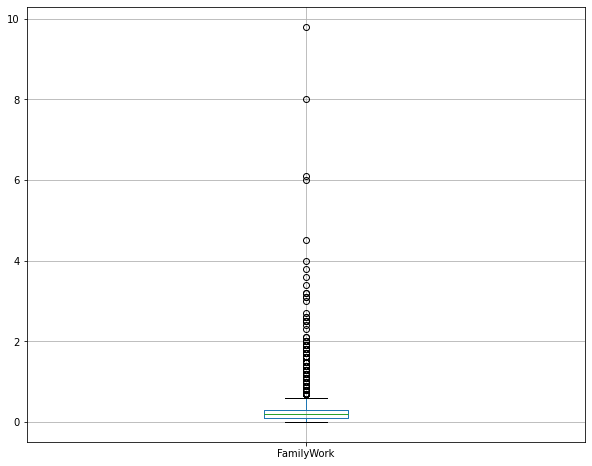

In [ ]:
plt.figure(figsize=(10,8))
census.boxplot(column=['FamilyWork'])

In [ ]:
#IQR
q1=np.percentile(census['FamilyWork'],25)
q3=np.percentile(census['FamilyWork'],75)

iqr=q3-q1

upper=q3+(3*iqr)
lower=q1-(3*iqr)



In [ ]:
upper

0.8999999999999999

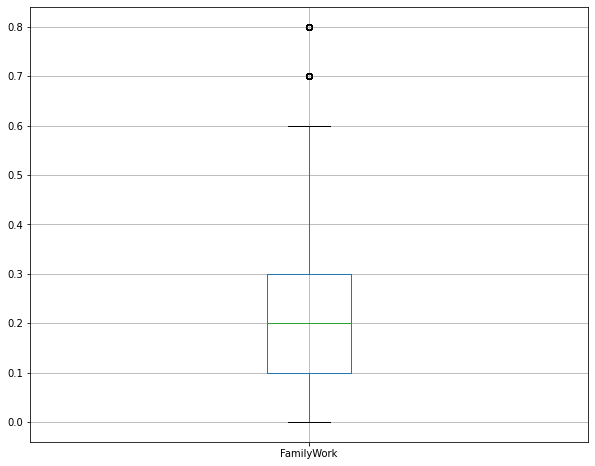

In [ ]:
census_s_ol=census[(census.FamilyWork <upper) &(census.FamilyWork  > lower )]
plt.figure(figsize=(10,8))
census_s_ol.boxplot(column=['FamilyWork'])

In [ ]:
census['HispanicRate']=census['Hispanic']/100.

In [ ]:
def porcen_ss(x):
  return x/100.
lista_a_convertir=['Hispanic', 'White', 
                   'Black', 'Native', 'Asian', 'Pacific', 'Poverty', 
                   'ChildPoverty', 'Professional', 'Service', 'Office', 
                   'Construction', 'Production', 'Drive', 'Carpool', 'Transit', 
                   'Walk', 'OtherTransp', 'WorkAtHome', 'Employed', 'PrivateWork', 
                   'PublicWork'] 

In [ ]:
new_column_list=[i+'Rate' for i in lista_a_convertir]

In [ ]:
new_column_list

In [ ]:
census[new_column_list]=census[lista_a_convertir].apply(porcen_ss)

In [ ]:
census

,CensusId,State,County,TotalPop,Men,Women,Hispanic,White,Black,Native,Asian,Pacific,Citizen,Income,IncomeErr,IncomePerCap,IncomePerCapErr,Poverty,ChildPoverty,Professional,Service,Office,Construction,Production,Drive,Carpool,Transit,Walk,OtherTransp,WorkAtHome,MeanCommute,Employed,PrivateWork,PublicWork,SelfEmployed,FamilyWork,Unemployment,HispanicRate,WhiteRate,BlackRate,NativeRate,AsianRate,PacificRate,PovertyRate,ChildPovertyRate,ProfessionalRate,ServiceRate,OfficeRate,ConstructionRate,ProductionRate,DriveRate,CarpoolRate,TransitRate,WalkRate,OtherTranspRate,WorkAtHomeRate,EmployedRate,PrivateWorkRate,PublicWorkRate
0,1001,Alabama,Autauga,55221,26745,28476,2.6,75.8,18.5,0.4,1.0,0.0,40725,51281.0,2391.0,24974,1080,12.9,18.6,33.2,17.0,24.2,8.6,17.1,87.5,8.8,0.1,0.5,1.3,1.8,26.5,23986,73.6,20.9,5.5,0.0,7.6,0.026,0.758,0.185,0.004,0.010,0.0,0.129,0.186,0.332,0.170,0.242,0.086,0.171,0.875,0.088,0.001,0.005,0.013,0.018,239.86,0.736,0.209
1,1003,Alabama,Baldwin,195121,95314,99807,4.5,83.1,9.5,0.6,0.7,0.0,147695,50254.0,1263.0,27317,711,13.4,19.2,33.1,17.7,27.1,10.8,11.2,84.7,8.8,0.1,1.0,1.4,3.9,26.4,85953,81.5,12.3,5.8,0.4,7.5,0.045,0.831,0.095,0.006,0.007,0.0,0.134,0.192,0.331,0.177,0.271,0.108,0.112,0.847,0.088,0.001,0.010,0.014,0.039,859.53,0.815,0.123
2,1005,Alabama,Barbour,26932,14497,12435,4.6,46.2,46.7,0.2,0.4,0.0,20714,32964.0,2973.0,16824,798,26.7,45.3,26.8,16.1,23.1,10.8,23.1,83.8,10.9,0.4,1.8,1.5,1.6,24.1,8597,71.8,20.8,7.3,0.1,17.6,0.046,0.462,0.467,0.002,0.004,0.0,0.267,0.453,0.268,0.161,0.231,0.108,0.231,0.838,0.109,0.004,0.018,0.015,0.016,85.97,0.718,0.208
3,1007,Alabama,Bibb,22604,12073,10531,2.2,74.5,21.4,0.4,0.1,0.0,17495,38678.0,3995.0,18431,1618,16.8,27.9,21.5,17.9,17.8,19.0,23.7,83.2,13.5,0.5,0.6,1.5,0.7,28.8,8294,76.8,16.1,6.7,0.4,8.3,0.022,0.745,0.214,0.004,0.001,0.0,0.168,0.279,0.215,0.179,0.178,0.190,0.237,0.832,0.135,0.005,0.006,0.015,0.007,82.94,0.768,0.161
4,1009,Alabama,Blount,57710,28512,29198,8.6,87.9,1.5,0.3,0.1,0.0,42345,45813.0,3141.0,20532,708,16.7,27.2,28.5,14.1,23.9,13.5,19.9,84.9,11.2,0.4,0.9,0.4,2.3,34.9,22189,82.0,13.5,4.2,0.4,7.7,0.086,0.879,0.015,0.003,0.001,0.0,0.167,0.272,0.285,0.141,0.239,0.135,0.199,0.849,0.112,0.004,0.009,0.004,0.023,221.89,0.820,0.135
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3215,72145,Puerto Rico,Vega Baja,56858,27379,29479,96.4,3.4,0.1,0.0,0.0,0.0,43656,16948.0,1234.0,9102,538,48.5,56.1,30.1,21.6,24.7,9.2,14.3,89.1,7.1,0.9,1.2,1.3,0.3,32.0,13660,78.3,17.6,4.1,0.0,15.2,0.964,0.034,0.001,0.000,0.000,0.0,0.485,0.561,0.301,0.216,0.247,0.092,0.143,0.891,0.071,0.009,0.012,0.013,0.003,136.60,0.783,0.176
3216,72147,Puerto Rico,Vieques,9130,4585,4545,96.7,2.9,0.0,0.0,0.0,0.0,7085,18104.0,3771.0,8821,939,39.1,58.1,18.4,38.2,18.5,15.7,9.1,69.1,17.8,1.0,10.8,0.0,1.4,14.0,2860,44.5,41.6,13.6,0.3,12.2,0.967,0.029,0.000,0.000,0.000,0.0,0.391,0.581,0.184,0.382,0.185,0.157,0.091,0.691,0.178,0.010,0.108,0.000,0.014,28.60,0.445,0.416
3217,72149,Puerto Rico,Villalba,24685,12086,12599,99.7,0.0,0.0,0.0,0.0,0.0,18458,17818.0,1255.0,8420,486,54.0,68.3,23.6,21.0,21.8,13.9,19.7,82.0,11.4,0.1,3.2,0.0,3.3,26.9,6795,59.2,27.5,13.1,0.2,25.9,0.997,0.000,0.000,0.000,0.000,0.0,0.540,0.683,0.236,0.210,0.218,0.139,0.197,0.820,0.114,0.001,0.032,0.000,0.033,67.95,0.592,0.275
3218,72151,Puerto Rico,Yabucoa,36279,17648,18631,99.8,0.2,0.0,0.0,0.1,0.0,27924,15627.0,1836.0,7960,512,52.3,62.1,25.9,25.9,20.7,12.8,14.7,86.0,7.9,0.0,2.3,2.3,1.5,29.5,8083,65.1,27.6,7.3,0.0,24.3,0.998,0.002,0.000,0.000,0.001,0.0,0.523,0.621,0.259,0.259,0.207,0.128,0.147,0.860,0.079,0.000,0.023,0.023,0.015,80.83,0.651,0.276


In [ ]:
round(census['NativeRate'],3)

0       0.004
1       0.006
2       0.002
3       0.004
4       0.003
        ...  
3215    0.000
3216    0.000
3217    0.000
3218    0.000
3219    0.000
Name: NativeRate, Length: 3220, dtype: float64

In [ ]:
#la estandarización es el proce de quitar medias de las distibuciojnes
# (y pro ende tener una media cero) y poner las varianzas a 1
from sklearn.preprocessing import MinMaxScaler

MinMaxScaler().fit_transform(census_s_ol.TotalPop.values.reshape(-1,1))


array([[0.00549256],
       [0.01942918],
       [0.00267446],
       ...,
       [0.00245061],
       [0.00360559],
       [0.00392387]])

In [ ]:
census_s_ol.TotalPop.values.T

array([ 55221, 195121,  26932, ...,  24685,  36279,  39474])

In [ ]:
census_s_ol.TotalPop.values.reshape(-1,1)

array([[ 55221],
       [195121],
       [ 26932],
       ...,
       [ 24685],
       [ 36279],
       [ 39474]])

In [ ]:
states=pd.get_dummies(census.State)
census_dummy=pd.concat([census,states], axis=1)
census_dummy

,CensusId,State,County,TotalPop,Men,Women,Hispanic,White,Black,Native,Asian,Pacific,Citizen,Income,IncomeErr,IncomePerCap,IncomePerCapErr,Poverty,ChildPoverty,Professional,Service,Office,Construction,Production,Drive,Carpool,Transit,Walk,OtherTransp,WorkAtHome,MeanCommute,Employed,PrivateWork,PublicWork,SelfEmployed,FamilyWork,Unemployment,HispanicRate,WhiteRate,BlackRate,NativeRate,AsianRate,PacificRate,PovertyRate,ChildPovertyRate,ProfessionalRate,ServiceRate,OfficeRate,ConstructionRate,ProductionRate,DriveRate,CarpoolRate,TransitRate,WalkRate,OtherTranspRate,WorkAtHomeRate,EmployedRate,PrivateWorkRate,PublicWorkRate,Alabama,Alaska,Arizona,Arkansas,California,Colorado,Connecticut,Delaware,District of Columbia,Florida,Georgia,Hawaii,Idaho,Illinois,Indiana,Iowa,Kansas,Kentucky,Louisiana,Maine,Maryland,Massachusetts,Michigan,Minnesota,Mississippi,Missouri,Montana,Nebraska,Nevada,New Hampshire,New Jersey,New Mexico,New York,North Carolina,North Dakota,Ohio,Oklahoma,Oregon,Pennsylvania,Puerto Rico,Rhode Island,South Carolina,South Dakota,Tennessee,Texas,Utah,Vermont,Virginia,Washington,West Virginia,Wisconsin,Wyoming
0,1001,Alabama,Autauga,55221,26745,28476,2.6,75.8,18.5,0.4,1.0,0.0,40725,51281.0,2391.0,24974,1080,12.9,18.6,33.2,17.0,24.2,8.6,17.1,87.5,8.8,0.1,0.5,1.3,1.8,26.5,23986,73.6,20.9,5.5,0.0,7.6,0.026,0.758,0.185,0.004,0.010,0.0,0.129,0.186,0.332,0.170,0.242,0.086,0.171,0.875,0.088,0.001,0.005,0.013,0.018,239.86,0.736,0.209,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
1,1003,Alabama,Baldwin,195121,95314,99807,4.5,83.1,9.5,0.6,0.7,0.0,147695,50254.0,1263.0,27317,711,13.4,19.2,33.1,17.7,27.1,10.8,11.2,84.7,8.8,0.1,1.0,1.4,3.9,26.4,85953,81.5,12.3,5.8,0.4,7.5,0.045,0.831,0.095,0.006,0.007,0.0,0.134,0.192,0.331,0.177,0.271,0.108,0.112,0.847,0.088,0.001,0.010,0.014,0.039,859.53,0.815,0.123,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
2,1005,Alabama,Barbour,26932,14497,12435,4.6,46.2,46.7,0.2,0.4,0.0,20714,32964.0,2973.0,16824,798,26.7,45.3,26.8,16.1,23.1,10.8,23.1,83.8,10.9,0.4,1.8,1.5,1.6,24.1,8597,71.8,20.8,7.3,0.1,17.6,0.046,0.462,0.467,0.002,0.004,0.0,0.267,0.453,0.268,0.161,0.231,0.108,0.231,0.838,0.109,0.004,0.018,0.015,0.016,85.97,0.718,0.208,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
3,1007,Alabama,Bibb,22604,12073,10531,2.2,74.5,21.4,0.4,0.1,0.0,17495,38678.0,3995.0,18431,1618,16.8,27.9,21.5,17.9,17.8,19.0,23.7,83.2,13.5,0.5,0.6,1.5,0.7,28.8,8294,76.8,16.1,6.7,0.4,8.3,0.022,0.745,0.214,0.004,0.001,0.0,0.168,0.279,0.215,0.179,0.178,0.190,0.237,0.832,0.135,0.005,0.006,0.015,0.007,82.94,0.768,0.161,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
4,1009,Alabama,Blount,57710,28512,29198,8.6,87.9,1.5,0.3,0.1,0.0,42345,45813.0,3141.0,20532,708,16.7,27.2,28.5,14.1,23.9,13.5,19.9,84.9,11.2,0.4,0.9,0.4,2.3,34.9,22189,82.0,13.5,4.2,0.4,7.7,0.086,0.879,0.015,0.003,0.001,0.0,0.167,0.272,0.285,0.141,0.239,0.135,0.199,0.849,0.112,0.004,0.009,0.004,0.023,221.89,0.820,0.135,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3215,72145,Puerto Rico,Vega Baja,56858,27379,29479,96.4,3.4,0.1,0.0,0.0,0.0,43656,16948.0,1234.0,9102,538,48.5,56.1,30.1,21.6,24.7,9.2,14.3,89.1,7.1,0.9,1.2,1.3,0.3,32.0,13660,78.3,17.6,4.1,0.0,15.2,0.964,0.034,0.001,0.000,0.000,0.0,0.485,0.561,0.301,0.216,0.247,0.092,0.143,0.891,0.071,0.009,

In [ ]:
shuffled_census=census.sample(frac=1)
shuffled_census.head()


,CensusId,State,County,TotalPop,Men,Women,Hispanic,White,Black,Native,Asian,Pacific,Citizen,Income,IncomeErr,IncomePerCap,IncomePerCapErr,Poverty,ChildPoverty,Professional,Service,Office,Construction,Production,Drive,Carpool,Transit,Walk,OtherTransp,WorkAtHome,MeanCommute,Employed,PrivateWork,PublicWork,SelfEmployed,FamilyWork,Unemployment,HispanicRate,WhiteRate,BlackRate,NativeRate,AsianRate,PacificRate,PovertyRate,ChildPovertyRate,ProfessionalRate,ServiceRate,OfficeRate,ConstructionRate,ProductionRate,DriveRate,CarpoolRate,TransitRate,WalkRate,OtherTranspRate,WorkAtHomeRate,EmployedRate,PrivateWorkRate,PublicWorkRate
613,17037,Illinois,DeKalb,104345,51515,52830,10.6,78.4,6.6,0.1,2.4,0.0,77118,54101.0,2012.0,24025,694,18.7,22.0,33.4,19.1,25.1,8.3,14.1,78.2,10.9,2.0,4.0,1.7,3.3,25.8,51637,75.8,20.0,3.9,0.3,10.4,0.106,0.784,0.066,0.001,0.024,0.000,0.187,0.220,0.334,0.191,0.251,0.083,0.141,0.782,0.109,0.020,0.040,0.017,0.033,516.37,0.758,0.200
2224,41033,Oregon,Josephine,83409,40834,42575,6.9,87.8,0.3,1.1,0.7,0.1,65500,37665.0,1789.0,22470,1184,20.1,30.1,29.7,21.3,24.4,9.3,15.2,82.3,7.1,0.3,2.0,2.4,5.8,20.0,28510,76.0,13.2,10.7,0.1,12.3,0.069,0.878,0.003,0.011,0.007,0.001,0.201,0.301,0.297,0.213,0.244,0.093,0.152,0.823,0.071,0.003,0.020,0.024,0.058,285.10,0.760,0.132
1799,35007,New Mexico,Colfax,12997,6510,6487,48.6,47.9,0.3,0.8,1.1,0.0,10192,32380.0,3520.0,20534,1401,19.9,23.1,33.3,23.2,23.5,12.7,7.3,76.8,14.1,0.6,2.8,0.9,4.8,15.0,4981,68.7,24.2,6.7,0.4,9.5,0.486,0.479,0.003,0.008,0.011,0.000,0.199,0.231,0.333,0.232,0.235,0.127,0.073,0.768,0.141,0.006,0.028,0.009,0.048,49.81,0.687,0.242
1356,27085,Minnesota,McLeod,36046,17888,18158,5.3,92.4,0.4,0.2,0.6,0.0,26700,56128.0,2339.0,27612,793,8.1,11.8,30.5,17.3,20.7,10.1,21.4,82.7,8.9,0.3,2.9,1.5,3.7,22.8,18957,85.5,8.5,5.9,0.1,4.5,0.053,0.924,0.004,0.002,0.006,0.000,0.081,0.118,0.305,0.173,0.207,0.101,0.214,0.827,0.089,0.003,0.029,0.015,0.037,189.57,0.855,0.085
2523,48001,Texas,Anderson,57915,35469,22446,16.8,60.2,21.1,0.4,0.6,0.0,44111,41327.0,1842.0,17876,985,18.5,27.0,23.4,24.0,23.7,15.0,13.9,84.4,10.6,0.2,1.4,0.7,2.6,21.6,19859,69.8,23.6,6.4,0.1,4.3,0.168,0.602,0.211,0.004,0.006,0.000,0.185,0.270,0.234,0.240,0.237,0.150,0.139,0.844,0.106,0.002,0.014,0.007,0.026,198.59,0.698,0.236


In [ ]:
grupo1=census_dummy.sample(frac=0.5)
grupo2=census_dummy.sample(n=100)

In [ ]:
from sklearn.model_selection import train_test_split
entrenamientro,prueba= train_test_split(grupo1,test_size=0.1)

In [ ]:
len(grupo1)

1610

In [ ]:
len(census_train)

1449

In [ ]:
len(census_test)

161

In [ ]:
def funcioncita(x):
  return 'Hola','Mundo','Saturno'

In [ ]:
palabas=funcioncita(1)

In [ ]:
palabas[2]

'Saturno'

In [ ]:
palabra2

'Mundo'